In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git datasets transformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.3 MB/s eta 0:00:00


#Import packages:

In [2]:
from transformers import BeitFeatureExtractor, BeitForSemanticSegmentation
import torch
from datasets import load_dataset
from PIL import Image
import random
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
import json
from huggingface_hub import cached_download, hf_hub_url
from torch.utils.data import DataLoader
from datasets import load_metric

#Load dataset

In [4]:
ds = load_dataset("scene_parse_150")
train_ds = ds["train"]
test_ds = ds["test"]

## Fine tune BEiT model.
در اطلاعیه ای که در سامانه ایلرن گذاشته شده است، هدف یادگیری روند است و تنها ارائه کد کافی می باشد و نیازی به اجرا و ساخت مدل فاین تیون شده مدل نیست.

In [ ]:
# train_ds = ds["train"]
# test_ds = ds["test"]
# train_dataloader = DataLoader(train_ds, batch_size=2, shuffle=True)
# valid_dataloader = DataLoader(test_ds, batch_size=2)
# # load id2label mapping from a JSON on the hub
# repo_id = "datasets/huggingface/label-files"
# filename = "ade20k-id2label.json"
# id2label = json.load(open(cached_download(hf_hub_url(repo_id, filename)), "r"))
# id2label = {int(k): v for k, v in id2label.items()}
# label2id = {v: k for k, v in id2label.items()}
# model = BeitForSemanticSegmentation.from_pretrained("microsoft/beit-base-finetuned-ade-640-640")
# metric = load_metric("mean_iou")
# optimizer = torch.optim.AdamW(model.parameters(), lr=0.00006)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# model.train()
# for epoch in range(200):
#    print("Epoch:", epoch)
#    for idx, batch in enumerate(tqdm(train_dataloader)):
#         # get the inputs;
#         pixel_values = batch["pixel_values"].to(device)
#         labels = batch["labels"].to(device)

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = model(pixel_values=pixel_values, labels=labels)
#         loss, logits = outputs.loss, outputs.logits
        
#         loss.backward()
#         optimizer.step()

#         # evaluate
#         with torch.no_grad():
#           upsampled_logits = nn.functional.interpolate(logits, size=labels.shape[-2:], mode="bilinear", align_corners=False)
#           predicted = upsampled_logits.argmax(dim=1)
          
#           # note that the metric expects predictions + labels as numpy arrays
#           metric.add_batch(predictions=predicted.detach().cpu().numpy(), references=labels.detach().cpu().numpy())

#         # let's print loss and metrics every 100 batches
#         if idx % 100 == 0:
#           metrics = metric._compute(num_labels=len(id2label), 
#                                    ignore_index=255,
#                                    reduce_labels=False,
#           )

#           print("Loss:", loss.item())
#           print("Mean_iou:", metrics["mean_iou"])
#           print("Mean accuracy:", metrics["mean_accuracy"])

#Model:

In [5]:
model_name = "microsoft/beit-base-finetuned-ade-640-640"
feature_extractor = BeitFeatureExtractor(do_resize=True, size=640, do_center_crop=False)
model = BeitForSemanticSegmentation.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.8/dist-packages/transformers/models/beit/feature_extraction_beit.py:28: FutureWarning: The class BeitFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use BeitImageProcessor instead.
  warnings.warn(


Downloading:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/900M [00:00<?, ?B/s]

BeitForSemanticSegmentation(
  (beit): BeitModel(
    (embeddings): BeitEmbeddings(
      (patch_embeddings): BeitPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BeitEncoder(
      (layer): ModuleList(
        (0): BeitLayer(
          (attention): BeitAttention(
            (attention): BeitSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (relative_position_bias): BeitRelativePositionBias()
            )
            (output): BeitSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (in

In [6]:
!pip show torch

Name: torch
Version: 1.13.0+cu116
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.8/dist-packages
Requires: typing-extensions
Required-by: fastai, torchaudio, torchtext, torchvision


In [8]:
def ade_palette():
    return [[120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50],
            [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
            [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7],
            [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82],
            [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3],
            [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255],
            [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220],
            [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224],
            [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255],
            [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7],
            [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153],
            [6, 51, 255], [235, 12, 255], [160, 150, 20], [0, 163, 255],
            [140, 140, 140], [250, 10, 15], [20, 255, 0], [31, 255, 0],
            [255, 31, 0], [255, 224, 0], [153, 255, 0], [0, 0, 255],
            [255, 71, 0], [0, 235, 255], [0, 173, 255], [31, 0, 255],
            [11, 200, 200], [255, 82, 0], [0, 255, 245], [0, 61, 255],
            [0, 255, 112], [0, 255, 133], [255, 0, 0], [255, 163, 0],
            [255, 102, 0], [194, 255, 0], [0, 143, 255], [51, 255, 0],
            [0, 82, 255], [0, 255, 41], [0, 255, 173], [10, 0, 255],
            [173, 255, 0], [0, 255, 153], [255, 92, 0], [255, 0, 255],
            [255, 0, 245], [255, 0, 102], [255, 173, 0], [255, 0, 20],
            [255, 184, 184], [0, 31, 255], [0, 255, 61], [0, 71, 255],
            [255, 0, 204], [0, 255, 194], [0, 255, 82], [0, 10, 255],
            [0, 112, 255], [51, 0, 255], [0, 194, 255], [0, 122, 255],
            [0, 255, 163], [255, 153, 0], [0, 255, 10], [255, 112, 0],
            [143, 255, 0], [82, 0, 255], [163, 255, 0], [255, 235, 0],
            [8, 184, 170], [133, 0, 255], [0, 255, 92], [184, 0, 255],
            [255, 0, 31], [0, 184, 255], [0, 214, 255], [255, 0, 112],
            [92, 255, 0], [0, 224, 255], [112, 224, 255], [70, 184, 160],
            [163, 0, 255], [153, 0, 255], [71, 255, 0], [255, 0, 163],
            [255, 204, 0], [255, 0, 143], [0, 255, 235], [133, 255, 0],
            [255, 0, 235], [245, 0, 255], [255, 0, 122], [255, 245, 0],
            [10, 190, 212], [214, 255, 0], [0, 204, 255], [20, 0, 255],
            [255, 255, 0], [0, 153, 255], [0, 41, 255], [0, 255, 204],
            [41, 0, 255], [41, 255, 0], [173, 0, 255], [0, 245, 255],
            [71, 0, 255], [122, 0, 255], [0, 255, 184], [0, 92, 255],
            [184, 255, 0], [0, 133, 255], [255, 214, 0], [25, 194, 194],
            [102, 255, 0], [92, 0, 255]]

In [9]:
def segment_img(img):
  pixel_values = feature_extractor(img, return_tensors="pt").pixel_values.to(device)
  outputs = model(pixel_values)
  logits = outputs.logits
  logits = nn.functional.interpolate(outputs.logits,
                  size=img.size[::-1],
                  mode='bilinear',
                  align_corners=False)

  seg = logits.argmax(dim=1)[0].cpu()
  color_seg = np.zeros((seg.shape[0], seg.shape[1], 3), dtype=np.uint8)
  palette = np.array(ade_palette())
  for label, color in enumerate(palette):
      color_seg[seg == label, :] = color
  color_seg = color_seg[..., ::-1]

  img = np.array(img) * 0.5 + color_seg * 0.5
  img = img.astype(np.uint8)
  return img

#Load dataset and segmentation

select 3 randomly images

In [43]:
rand_index1 = random.randint(0,train_ds.shape[0])
img1 = train_ds[rand_index1]["image"]
orginal_seg1 = train_ds[rand_index1]["annotation"]

rand_index2 = random.randint(0,train_ds.shape[0])
img2 = train_ds[rand_index2]["image"]
orginal_seg2 = train_ds[rand_index2]["annotation"]

rand_index3 = random.randint(0,train_ds.shape[0])
img3 = train_ds[rand_index3]["image"]
orginal_seg3 = train_ds[rand_index3]["annotation"]

image 1:

index image: 8953


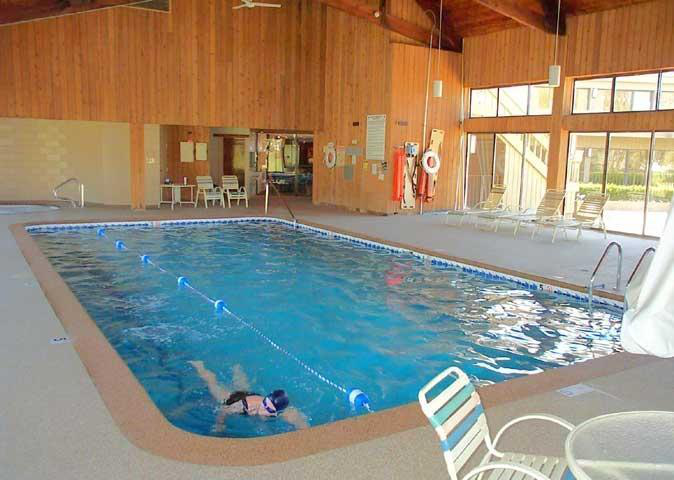

In [26]:
print(f"index image: {rand_index1}")
img1

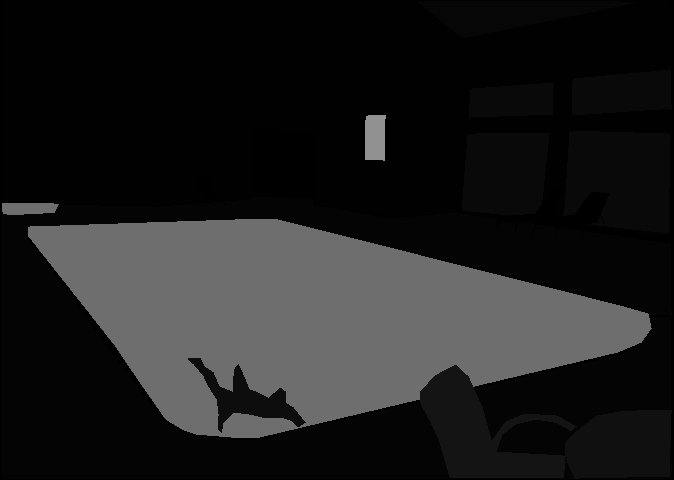

In [27]:
orginal_seg1

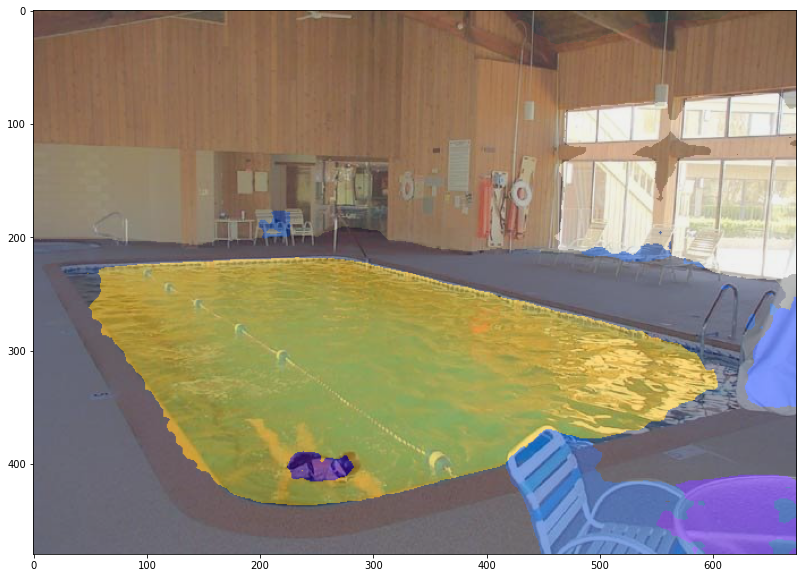

In [28]:
beit_seg1 = segment_img(img1)
plt.figure(figsize=(15, 10))
plt.imshow(beit_seg1)
plt.show()

image2:

index image: 15990


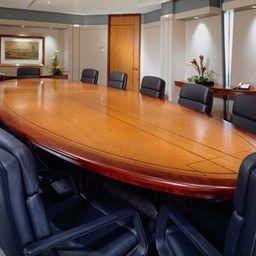

In [34]:
print(f"index image: {rand_index2}")
img2

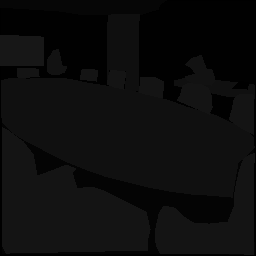

In [35]:
orginal_seg2

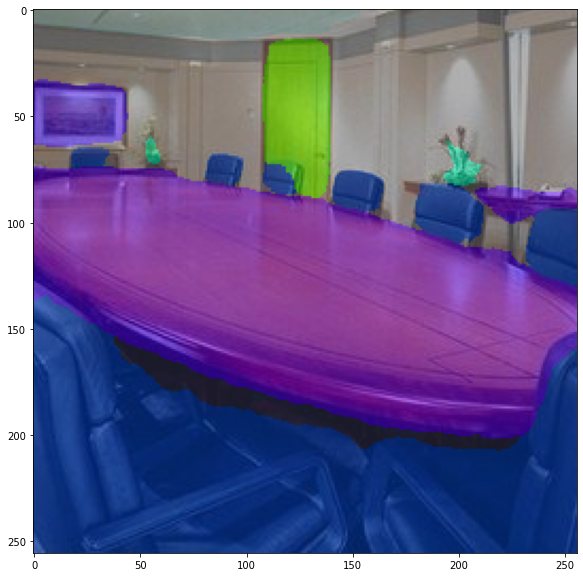

In [36]:
beit_seg2 = segment_img(img2)
plt.figure(figsize=(15, 10))
plt.imshow(beit_seg2)
plt.show()

image3:

index image: 17178


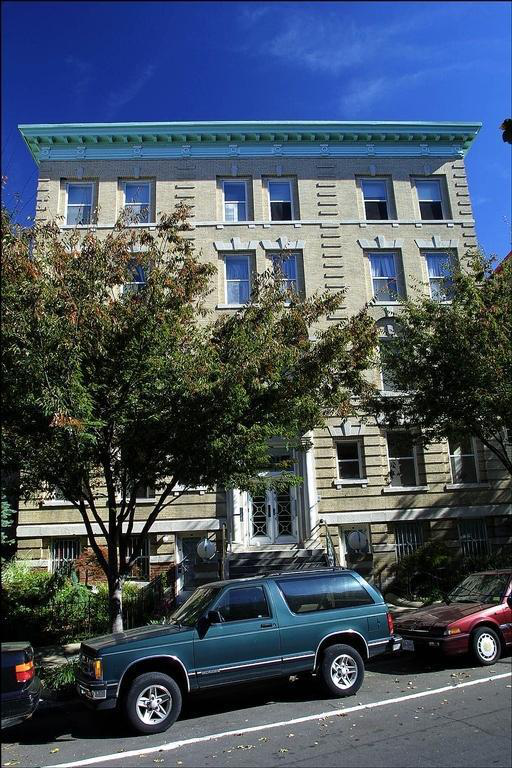

In [44]:
print(f"index image: {rand_index3}")
img3

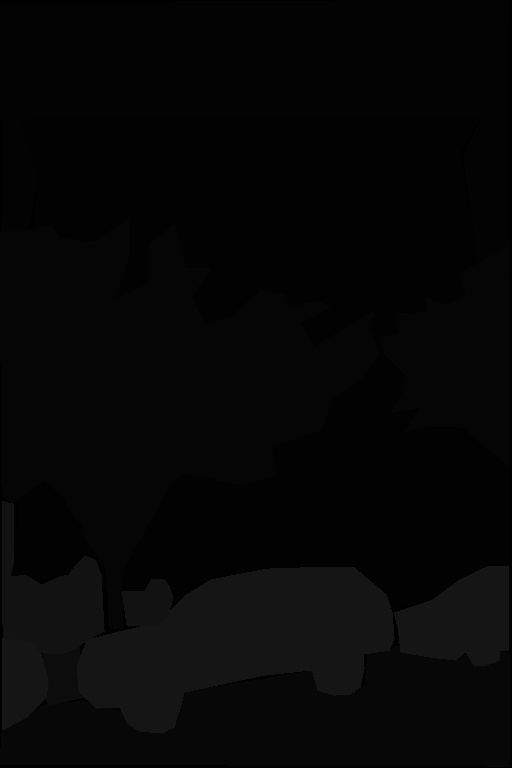

In [45]:
orginal_seg3

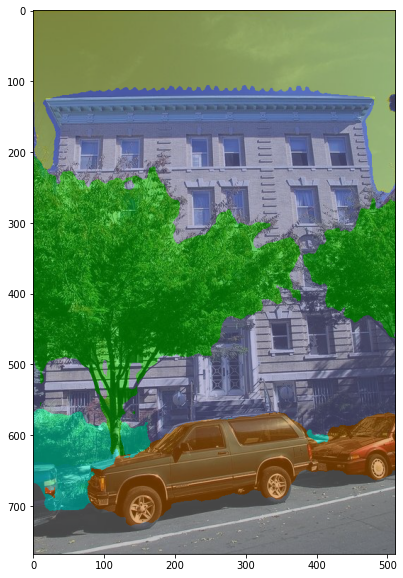

In [46]:
beit_seg3 = segment_img(img3)
plt.figure(figsize=(15, 10))
plt.imshow(beit_seg3)
plt.show()